In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

/home/vhyne/anaconda3/envs/TF-py/lib/python3.7/site-packages/sklearn/utils/validation.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LARGE_SPARSE_SUPPORTED = LooseVersion(scipy_version) >= '0.14.0'


In [13]:
df = pd.read_csv("./data/household_power_consumption.txt", sep=";", header=0,
                low_memory=False, infer_datetime_format=True,parse_dates=True)

In [15]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [16]:
df = pd.read_csv("./data/household_power_consumption.txt", sep=";", header=0,
                low_memory=False, infer_datetime_format=True, parse_dates={"datetime": [0,1]},
                index_col=['datetime'])

In [17]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [18]:
df.replace("?", np.nan, inplace=True)
values = df.values.astype('float32')
df["Sub_metering_4"] = (((values[:,0] * 1000)/60) - (values[:,4] + values[:,5] + values[:,6]))


In [20]:
df.to_csv("./data/household_power_consumption.csv")

In [2]:
df = pd.read_csv("./data/household_power_consumption.csv", parse_dates=True, index_col=0)
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Sub_metering_4
datetime,,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,52.266670
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,72.333336
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,70.566666
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,71.800000
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,43.100000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
 7   Sub_metering_4         float64
dtypes: float64(8)
memory usage: 142.5 MB


In [4]:
df.index.resolution

'minute'

In [27]:
df["2007-04-28 00:00:00": "2007-04-29 00:00:00"]

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Sub_metering_4
datetime,,,,,,,,
2007-04-28 00:00:00,1.368,0.086,233.05,5.8,0.0,1.0,0.0,21.800000
2007-04-28 00:01:00,1.370,0.086,233.22,5.8,0.0,1.0,0.0,21.833334
2007-04-28 00:02:00,1.372,0.088,233.57,5.8,0.0,2.0,0.0,20.866667
2007-04-28 00:03:00,1.370,0.086,233.40,5.8,0.0,1.0,0.0,21.833334
2007-04-28 00:04:00,1.368,0.086,233.25,5.8,0.0,1.0,0.0,21.800000
...,...,...,...,...,...,...,...,...
2007-04-28 23:56:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-04-28 23:57:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-04-28 23:58:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


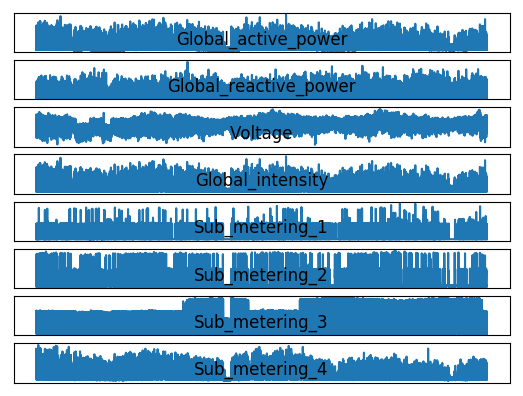

In [5]:
for i in range(len(df.columns)):
    plt.subplot(len(df.columns), 1, i+1)
    name = df.columns[i]
    plt.plot(df[name])
    plt.title(name, y=0)
    plt.xticks([])
    plt.yticks([])
plt.show()

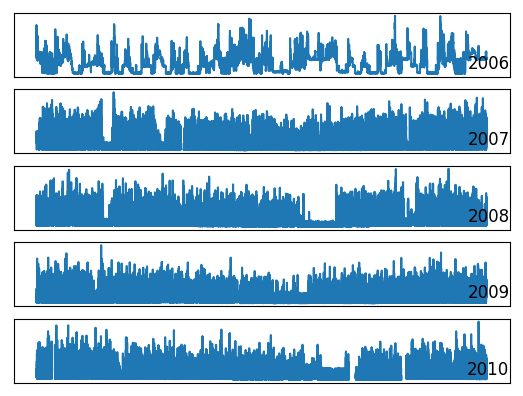

In [7]:
years = list(df.index.year.unique())
for i in range(len(years)):
    plt.subplot(len(years), 1, i+1)
    year = years[i]
    plt.plot(df.loc[str(year)]["Global_active_power"])
    plt.title(year, y=0, loc="right")
    plt.xticks([])
    plt.yticks([])
plt.show()

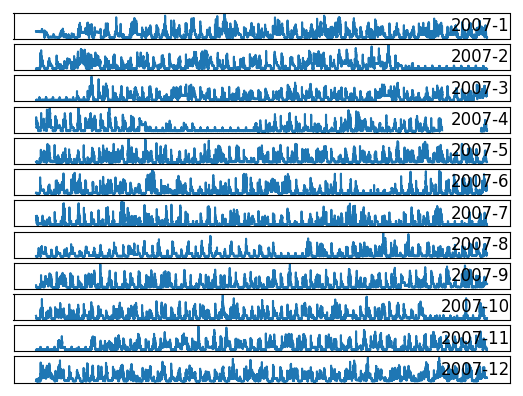

In [14]:
months = list(df.loc["2007"].index.month.unique())
for i in range(len(months)):
    plt.subplot(len(months), 1, i+1)
    month = months[i]
    month_string = df.loc[f"2007-{str(month)}"]
    plt.plot(month_string["Global_active_power"])
    plt.title(f"2007-{str(month)}", y=0, loc="right")
    plt.xticks([])
    plt.yticks([])
plt.show()
    

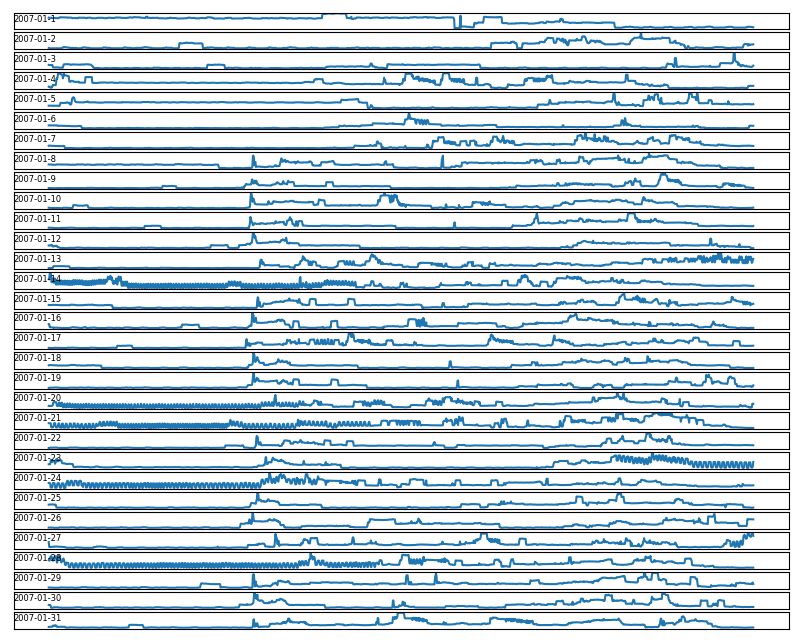

In [29]:
plt.figure(figsize=(10,8))
days = list(df.loc["2007-01"].index.day.unique())
for i in range(len(days)):
    plt.subplot(len(days), 1, i+1)
    day = f"2007-01-{str(days[i])}"
    plt.plot(df.loc[day]["Global_active_power"])
    plt.title(day, y=0, loc="left", size=6)
    plt.xticks([])
    plt.yticks([])
plt.show()

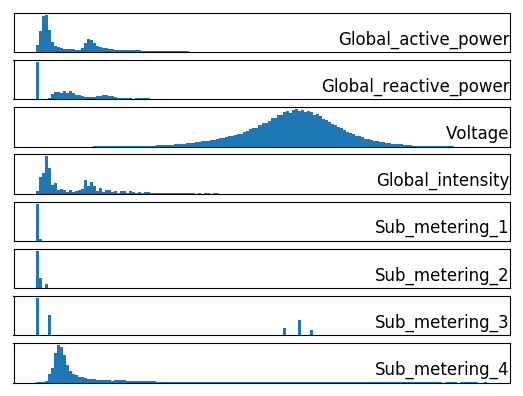

In [30]:
for i in range(len(df.columns)):
    plt.subplot(len(df.columns), 1, i+1)
    name = df.columns[i]
    df[name].hist(bins=150)
    plt.title(name, y=0, loc="right")
    plt.yticks([])
    plt.xticks([])
plt.show()

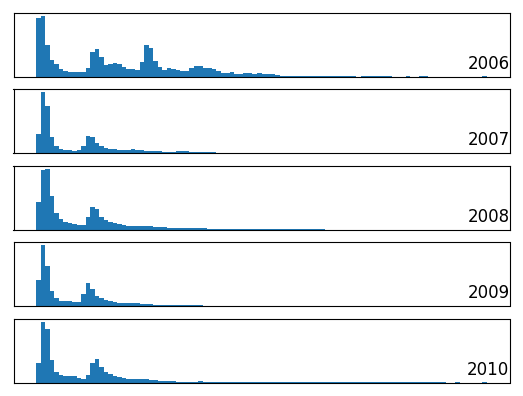

In [32]:
for i in range(len(years)):
    plt.subplot(len(years), 1, i+1)
    year = years[i]
    df.loc[str(year)]["Global_active_power"].hist(bins=100)
    plt.title(year, y=0, loc="right")
    plt.yticks([])
    plt.xticks([])
plt.show()

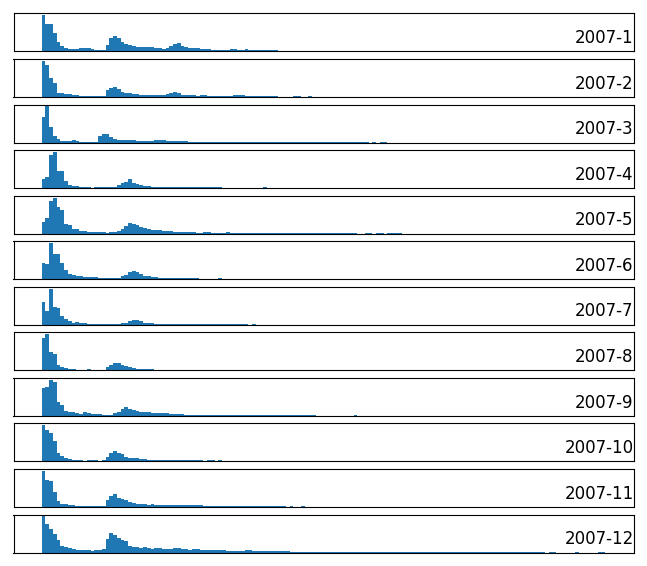

In [35]:
plt.figure(figsize=(8,7))
for i in range(len(months)):
    ax = plt.subplot(len(months), 1, i+1)
    month = f"2007-{months[i]}"
    df.loc[month]["Global_active_power"].hist(bins=150)
    plt.title(month, y=0, loc="right")
    plt.yticks([])
    plt.xticks([])
plt.show()

In [36]:
def fill_missing_daily(values: np):
    day = 60 * 24
    for row in range(values.shape[0]):
        for cols in range(values.shape[1]):
            if np.isnan(values[row, cols]):
                values[row, cols] = values[row - day, cols]

In [37]:
df = df.astype("float32")
fill_missing_daily(df.values)

In [39]:
df_daily = df.resample("D")
df_daily_sum = df_daily.sum() # You can also choose to use the mean
print(df_daily_sum.shape)

(1442, 8)


In [40]:
df_daily_sum.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Sub_metering_4
datetime,,,,,,,,
2006-12-16,1209.176025,34.922001,93552.53125,5180.799805,0.0,546.0,4926.0,14680.933594
2006-12-17,3390.459961,226.005997,345725.31250,14398.599609,2033.0,4187.0,13341.0,36946.667969
2006-12-18,2203.825928,161.792007,347373.62500,9247.200195,1063.0,2621.0,14018.0,19028.433594
2006-12-19,1666.193970,150.942001,348479.00000,7094.000000,839.0,7602.0,6197.0,13131.900391
2006-12-20,2225.748047,160.998001,348923.62500,9313.000000,0.0,2648.0,14063.0,20384.800781


In [41]:
df_daily_sum.to_csv("./data/household_power_consumption_daily.csv")

In [2]:
df = pd.read_csv("./data/household_power_consumption_daily.csv", parse_dates=True, index_col=0)
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Sub_metering_4
datetime,,,,,,,,
2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0,14680.934
2006-12-17,3390.460,226.006,345725.30,14398.6,2033.0,4187.0,13341.0,36946.668
2006-12-18,2203.826,161.792,347373.62,9247.2,1063.0,2621.0,14018.0,19028.434
2006-12-19,1666.194,150.942,348479.00,7094.0,839.0,7602.0,6197.0,13131.900
2006-12-20,2225.748,160.998,348923.62,9313.0,0.0,2648.0,14063.0,20384.800


In [3]:
def rmse_evaluation(actual: np, predicted: np):
    scores = list()

    for i in range(actual.shape[1]):
        rmse = np.sqrt(mean_squared_error(actual[:, i], predicted[:, i]))
        scores.append(rmse)
    s = 0
    for row in range(actual.shape[0]):
        for col in range(actual.shape[1]):
            s += (actual[row, col] - predicted[row, col])**2
    score = np.sqrt(s/(actual.shape[0] * actual.shape[1]))
    return score, scores

In [12]:
train = df.loc["2006-12-17": "2010-01-02"]
train.shape

(1113, 8)

In [14]:
test = df.loc["2010-01-03":]
test.shape

(328, 8)

In [21]:
df[-8:-6]

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Sub_metering_4
datetime,,,,,,,,
2010-11-19,1570.400,122.928,345667.34,6593.0,0.0,483.0,11914.0,13776.333
2010-11-20,2197.006,153.768,346476.00,9320.2,4367.0,2947.0,11433.0,17869.768


In [22]:
def split_data(data):
    train, test = data[1: -328], data[-328:-6]
    train = np.array(np.split(train, len(train)/7))
    test = np.array(np.split(test, len(test)/7))
    return train, test

In [23]:
train, test = split_data(df.values)
train.shape, test.shape

((159, 7, 8), (46, 7, 8))

In [41]:
check_array = df.values[0:7]
check_array = np.split(check_array, 7)
check_array = np.array(check_array)
check_array

array([[[1.2091760e+03, 3.4922000e+01, 9.3552530e+04, 5.1808000e+03,
         0.0000000e+00, 5.4600000e+02, 4.9260000e+03, 1.4680934e+04]],

       [[3.3904600e+03, 2.2600600e+02, 3.4572530e+05, 1.4398600e+04,
         2.0330000e+03, 4.1870000e+03, 1.3341000e+04, 3.6946668e+04]],

       [[2.2038260e+03, 1.6179200e+02, 3.4737362e+05, 9.2472000e+03,
         1.0630000e+03, 2.6210000e+03, 1.4018000e+04, 1.9028434e+04]],

       [[1.6661940e+03, 1.5094200e+02, 3.4847900e+05, 7.0940000e+03,
         8.3900000e+02, 7.6020000e+03, 6.1970000e+03, 1.3131900e+04]],

       [[2.2257480e+03, 1.6099800e+02, 3.4892362e+05, 9.3130000e+03,
         0.0000000e+00, 2.6480000e+03, 1.4063000e+04, 2.0384800e+04]],

       [[1.7232880e+03, 1.4443400e+02, 3.4709640e+05, 7.2664000e+03,
         1.7650000e+03, 2.6920000e+03, 1.0456000e+04, 1.3808467e+04]],

       [[2.3413380e+03, 1.8690600e+02, 3.4730575e+05, 9.8970000e+03,
         3.1510000e+03, 3.5000000e+02, 1.1131000e+04, 2.4390300e+04]]])

In [42]:
check_array.shape

(7, 1, 8)

In [161]:
def model_prediction(model, train: np, test: np):
    history = [obs for obs in train]
    predictions = list()

    for v in range(len(test)):
        yhat = model(history)
        predictions.append(yhat)
        history.append(test[v, :])
    predictions = np.array(predictions)
    return predictions

def evaluate_model(model, train, test):
    history = [obs for obs in train]
    predictions = list()

    for v in range(len(test)):
        yhat = model(history)
        predictions.append(yhat)
        history.append(test[v, :])
    predictions = np.array(predictions)
    score, scores = rmse_evaluation(test[:,:,0], predictions)
    return score, scores

In [182]:
def sunnarize_scores(name, score, scores):
    n_scores = ", ".join(["%.1f"%s for s in scores ])
    print("%s: {%.3f} %s" % (name, score, n_scores))

In [60]:
train[-1]

array([[2.1954520e+03, 2.0716400e+02, 3.4943910e+05, 9.1652000e+03,
        4.2180000e+03, 3.1800000e+02, 1.2450000e+04, 1.9604867e+04],
       [2.0940980e+03, 1.8166800e+02, 3.5103975e+05, 8.6880000e+03,
        2.1750000e+03, 2.0630000e+03, 1.4934000e+04, 1.5729633e+04],
       [2.0479680e+03, 2.4205000e+02, 3.5018353e+05, 8.5142000e+03,
        1.2600000e+03, 3.4600000e+02, 1.0205000e+04, 2.2321800e+04],
       [2.4511100e+03, 2.6679400e+02, 3.4711522e+05, 1.0322600e+04,
        5.2840000e+03, 4.5390000e+03, 1.2484000e+04, 1.8544834e+04],
       [2.2118920e+03, 1.8661200e+02, 3.4698070e+05, 9.2184000e+03,
        0.0000000e+00, 3.8700000e+02, 1.9409000e+04, 1.7068867e+04],
       [1.2242520e+03, 1.6533600e+02, 3.4929462e+05, 5.0934000e+03,
        2.3040000e+03, 3.2700000e+02, 3.5580000e+03, 1.4215200e+04],
       [1.3092680e+03, 1.9954600e+02, 3.5233284e+05, 5.4898000e+03,
        8.0100000e+02, 2.9800000e+02, 6.4250000e+03, 1.4297134e+04]])

In [63]:
train[-1][:,0]

array([2195.452, 2094.098, 2047.968, 2451.11 , 2211.892, 1224.252,
       1309.268])

In [64]:
def persistent_daily(history):
    last_week = history[-1] # Get recent/last week of train data

    # Get last day of active power which is the
    day_value =last_week[-1, 0]

    # forecast the next one week with the value of the day retirieved above
    forecast = [day_value for _ in range(7)]
    return forecast

def persistent_weekly(history):
    last_week = history[-1]
    # Return the last week of the 0th index (Global active power)
    return last_week[:,0]

def week_from_last_year(history):
    # Get the week of the same time last year for the Global active Power
    last_week_yesr = history[-52]
    return last_week_yesr[:, 0]
    

In [170]:
daily_model = model_prediction(persistent_daily, train=train, test=test)
weekly_model = model_prediction(persistent_weekly, train=train, test=test)
weekly_oya = model_prediction(week_from_last_year, train=train, test=test)

In [171]:
daily_model.shape, weekly_model.shape, weekly_oya.shape

((46, 7), (46, 7), (46, 7))

In [164]:
test_values = list()
for v in range(len(test)):
    instance =  test[v][:,0]
    test_values.append(instance)
week_test = np.array(test_values)

In [165]:
week_test[0:3]

array([[2083.454, 1604.132, 2219.78 , 1777.18 , 1769.442, 1797.208,
        2336.9  ],
       [2508.466, 1518.684, 1995.796, 1995.796, 2116.224, 2196.76 ,
        2150.112],
       [1906.556, 1881.098, 2433.508, 2351.728, 2137.856, 1790.626,
        2610.33 ]])

In [167]:
def flatten_shape(array: np):
    array_multiplication = array.shape[0] * array.shape[1]
    return np.reshape(array, (array_multiplication,))

In [172]:
daily_predictions = flatten_shape(daily_model)
weekly_predictions = flatten_shape(weekly_model)
oya_predictions = flatten_shape(weekly_oya)
test_values = flatten_shape(week_test)

In [158]:
week_test = np.reshape(week_test, (21,))
week_test.shape

(21,)

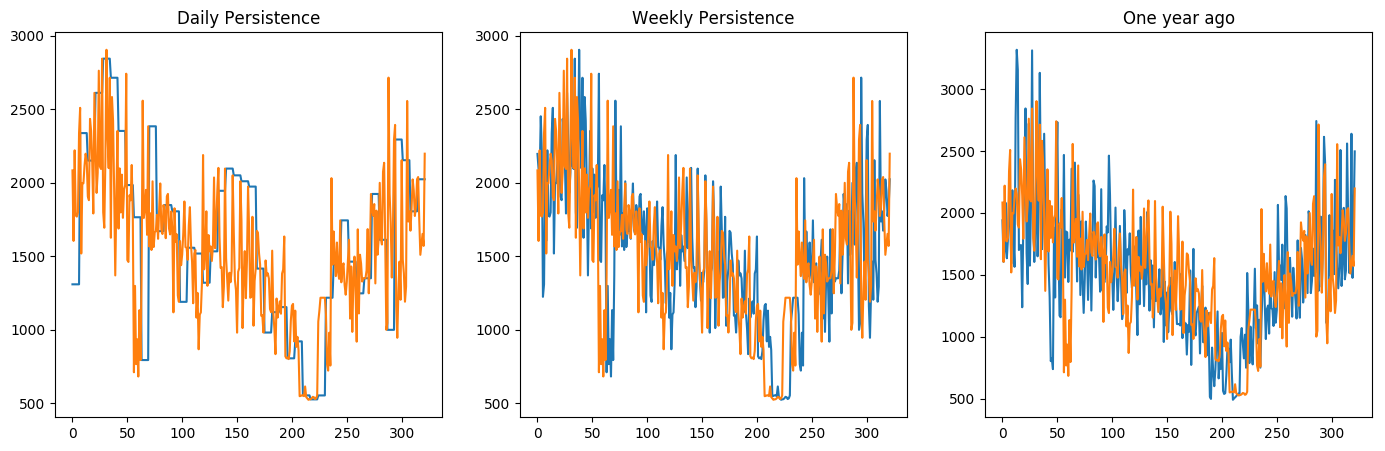

In [181]:
predictions = [daily_predictions, weekly_predictions, oya_predictions]
labels = ["Daily Persistence", "Weekly Persistence", "One year ago"]
plt.figure(figsize=(17,5))
for i in range(len(predictions)):
    ax = plt.subplot(1, len(predictions), i+1)
    plt.plot(predictions[i])
    plt.plot(test_values)
    plt.title(labels[i])
plt.show()

daily: {511.886} 452.9, 596.4, 532.1, 490.5, 534.3, 481.5, 482.0
weekly: {469.389} 567.6, 500.3, 411.2, 466.1, 471.9, 358.3, 482.0
week_oya: {465.294} 550.0, 446.7, 398.6, 487.0, 459.3, 313.5, 555.1


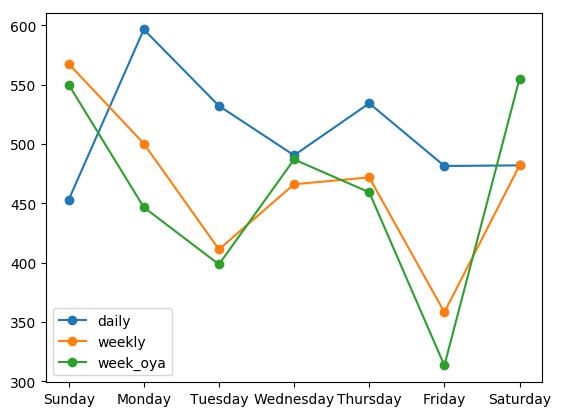

In [183]:
model_dict = dict()

model_dict['daily'] = persistent_daily
model_dict['weekly'] = persistent_weekly
model_dict['week_oya'] = week_from_last_year

days = ["Sunday","Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
for name, funct in model_dict.items():

    score, scores = evaluate_model(funct, train, test)

    sunnarize_scores(name, score,scores)

    plt.plot(days, scores, marker='o', label=name)
plt.legend()
plt.show()